# Data Cleaning

In this notebook, the focus will be on cleaning and preprocessing the customer dataset to ensure its quality and usability for subsequent analyses and modeling. Data cleaning is a crucial step in the data analysis pipeline, as it directly impacts the reliability of the insights derived from the data.

## Objectives

The primary objectives of this notebook include:

1. **Identifying Missing Values**: Assessing the dataset for any missing or null values and determining appropriate strategies for handling them.
  
2. **Outlier Detection**: Identifying any outliers in the dataset that may skew the results of future analyses and deciding how to address them.

3. **Data Type Correction**: Ensuring that each feature has the correct data type to facilitate proper analysis and visualization.

4. **Feature Engineering**: Creating new features or modifying existing ones to enhance the dataset's informational value.


By the end of this cleaning process, the dataset will be transformed into a high-quality resource ready for further analysis and modeling, leading to more accurate insights into customer behavior and business performance.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

%run ../customer_personality_analysis/utils/pandas_missing_handler.py
%run ../customer_personality_analysis/utils/pandas_explorer.py

## Data Load and First Visualization:

In [2]:
path = '../customer_personality_analysis/data/marketing_campaign.csv'
df = pd.read_csv(path, sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Looking for Missing Values:

In [3]:
df.missing.summary()

,nan,NA,N/A,n/a,N / A,n / a,/,-,*,,None
ID,0,0,0,0,0,0,0,0,0,0,0
Year_Birth,0,0,0,0,0,0,0,0,0,0,0
Education,0,0,0,0,0,0,0,0,0,0,0
Marital_Status,0,0,0,0,0,0,0,0,0,0,0
Income,24,0,0,0,0,0,0,0,0,0,24
Kidhome,0,0,0,0,0,0,0,0,0,0,0
Teenhome,0,0,0,0,0,0,0,0,0,0,0
Dt_Customer,0,0,0,0,0,0,0,0,0,0,0
Recency,0,0,0,0,0,0,0,0,0,0,0
MntWines,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


- It seems that there is no relationship between these missing values, so it makes sense to treat them as MCAR (Missing Completely At Random).
- It would be possible to apply imputation using KNN (K-Nearest Neighbors), but it would be beneficial to clean the dataset as much as possible beforehand.

## Handling Outliers:

### Year_Birth:

In [5]:
print(f"The number of records with a date of birth before 1940 is {df[df['Year_Birth'] < 1940].shape[0]}")

The number of records with a date of birth before 1940 is 3


- These data points may be valid, but they are not representative of the population and could introduce bias into the analysis. Therefore, they will be removed.

In [6]:
df = df.drop(df[df['Year_Birth'] < 1940].index, axis=0)
df.shape

(2237, 29)

### Income:

In [7]:
print(f"The number of records with an Income value greater than or equal to 150000 is: {df[df['Income'] >= 150000].shape[0]}")

The number of records with an Income value greater than or equal to 150000 is: 8


- These data points may be valid, but they are not representative of the population and could introduce bias into the analysis. Therefore, they will be removed.

In [8]:
df = df.drop(df[df['Income'] >= 150000].index, axis=0)
df.shape

(2229, 29)

### Marital_Status:

In [9]:
filter_ = (df['Marital_Status'] == 'Alone') | (df['Marital_Status'] == 'Absurd') | (df['Marital_Status'] == 'YOLO')
df[filter_]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
131,433,1958,Master,Alone,61331.0,1,1,10-03-2013,42,534,...,8,0,0,0,0,0,0,3,11,0
138,7660,1973,PhD,Alone,35860.0,1,1,19-05-2014,37,15,...,5,1,0,0,0,0,0,3,11,1
153,92,1988,Graduation,Alone,34176.0,1,0,12-05-2014,12,5,...,6,0,0,0,0,0,0,3,11,0
2093,7734,1993,Graduation,Absurd,79244.0,0,0,19-12-2012,58,471,...,1,0,0,1,1,0,0,3,11,1
2134,4369,1957,Master,Absurd,65487.0,0,0,10-01-2014,48,240,...,2,0,0,0,0,0,0,3,11,0
2177,492,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,...,8,0,0,0,0,0,0,3,11,0
2202,11133,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,...,8,0,0,0,0,0,0,3,11,1


- This column contains some records with values 'Alone', 'Absurd', and 'YOLO', which do not make sense and can be treated as outliers.
- The 'Alone' values will be replaced with 'Single', while 'Absurd' and 'YOLO' will be imputed using the mode, which is 'Married'.

In [10]:
df['Marital_Status'] = df['Marital_Status'].replace({'Alone': 'Single', 'Absurd': 'Married', 'YOLO': 'Married'})

### MntMeatProducts:

In [11]:
filter_ = df['MntMeatProducts'] >= 1500
print(f"The number of records with a MntMeatProducts value greater than or equal to 1500 is: {df[filter_].shape[0]}")

The number of records with a MntMeatProducts value greater than or equal to 1500 is: 2


- These data points may be valid, but they are not representative of the population and could introduce bias into the analysis. Therefore, they will be removed.

In [12]:
df = df.drop(df[filter_].index, axis=0)
df.shape

(2227, 29)

### MntSweetProducts:

In [13]:
print(f"The number of records with a MntSweetProducts value greater than or equal to 250 is: {df[df['MntSweetProducts'] >= 250].shape[0]}")

The number of records with a MntSweetProducts value greater than or equal to 250 is: 2


- These data points may be valid, but they are not representative of the population and could introduce bias into the analysis. Therefore, they will be removed.

In [14]:
df = df.drop(df[df['MntSweetProducts'] >= 250].index,axis=0)
df.shape

(2225, 29)

### MntGoldProds:

In [15]:
print(f"The number of records with a MntGoldProds value greater than or equal to 250 is: {df[df['MntGoldProds'] >= 250].shape[0]}")

The number of records with a MntGoldProds value greater than or equal to 250 is: 3


- These data points may be valid, but they are not representative of the population and could introduce bias into the analysis. Therefore, they will be removed.

In [16]:
df = df.drop(df[df['MntGoldProds'] >= 250].index,axis=0)
df.shape

(2222, 29)

### NumWebVisitsMonth:

In [17]:
print(f"The number of records with a MntGoldProds value greater than or equal to 250 is: {df[df['NumWebVisitsMonth'] >= 12].shape[0]}")

The number of records with a MntGoldProds value greater than or equal to 250 is: 8


- These data points may be valid, but they are not representative of the population and could introduce bias into the analysis. Therefore, they will be removed.

In [18]:
df = df.drop(df[df['NumWebVisitsMonth'] >= 12].index, axis=0)
df.shape

(2214, 29)

## Applying KNN to impute missing values in the Income Feature:

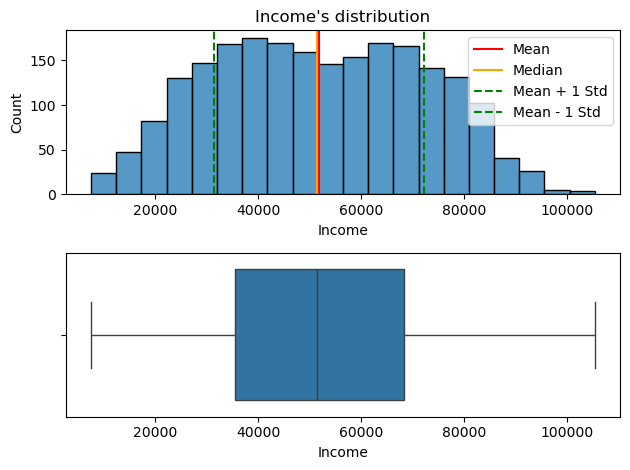

2192


,values
count,2214.000000
mean,51848.756387
median,51400.500000
std,20441.690794
max,105471.000000
min,7500.000000
IQR,97971.000000
Q1,35538.750000
Q2,51400.500000
Q3,68363.250000


In [19]:
df.explorer.numerical_dist('Income')
print(df['Income'].notnull().sum())
df.explorer.feature_describe('Income')

In [20]:
# Preparing the data: Select only the numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_columns]

# Initialize the KNNImputer and specify the number of neighbors
imputer = KNNImputer(n_neighbors=5)

# Apply the KNN imputer to fill the missing values in the numeric columns
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=numeric_columns)

# Merge the imputed 'Income' column back into the original DataFrame
df['Income'] = df_imputed['Income'].values

# Print the number of missing values in 'Income' after imputation
print(f"The number of missing values in 'Income' is: {df['Income'].isnull().sum()}")


The number of missing values in 'Income' is: 0


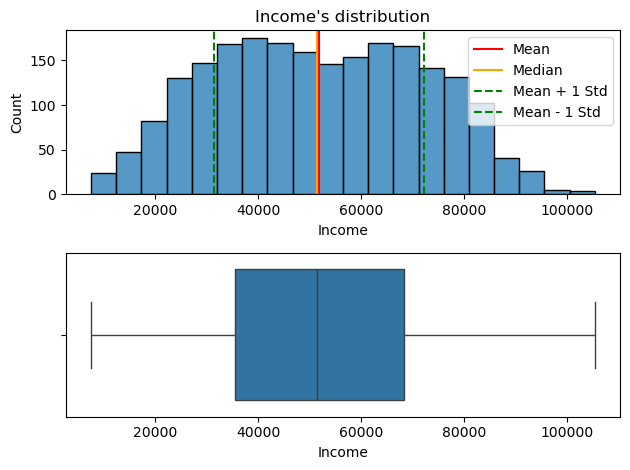

2214


,values
count,2214.000000
mean,51848.756387
median,51400.500000
std,20441.690794
max,105471.000000
min,7500.000000
IQR,97971.000000
Q1,35538.750000
Q2,51400.500000
Q3,68363.250000


In [21]:
df.explorer.numerical_dist('Income')
print(df['Income'].notnull().sum())
df.explorer.feature_describe('Income')

In [22]:
df.missing.summary()

,nan,NA,N/A,n/a,N / A,n / a,/,-,*,,None
ID,0,0,0,0,0,0,0,0,0,0,0
Year_Birth,0,0,0,0,0,0,0,0,0,0,0
Education,0,0,0,0,0,0,0,0,0,0,0
Marital_Status,0,0,0,0,0,0,0,0,0,0,0
Income,0,0,0,0,0,0,0,0,0,0,0
Kidhome,0,0,0,0,0,0,0,0,0,0,0
Teenhome,0,0,0,0,0,0,0,0,0,0,0
Dt_Customer,0,0,0,0,0,0,0,0,0,0,0
Recency,0,0,0,0,0,0,0,0,0,0,0
MntWines,0,0,0,0,0,0,0,0,0,0,0


## Removing unnecessary columns:

In [23]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

## Turning the dt_customer column into year_joining and quarter_joining columns:

In [24]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y')
df['YearJoining'] = df['Dt_Customer'].dt.year
df['QuarterJoining'] = df['Dt_Customer'].dt.quarter

In [25]:
df = df.drop(columns=['ID','Z_CostContact','Z_Revenue','Dt_Customer'])

## Saving the cleaned dataset into a new .csv file:

In [26]:
df.to_csv('../customer_personality_analysis/data/cleaned_data.csv')

## Conclusions

In this notebook, the process of handling missing values and outliers in the dataset was conducted, specifically focusing on the 'Income' feature and other relevant columns. The following key points were observed:

1. **Identification of Missing Values**: The initial analysis revealed that there were 21 missing values in the 'Income' column. These missing entries could potentially bias the results of the analysis.

2. **Imputation of Missing Values**: The K-Nearest Neighbors (KNN) imputation method was chosen due to its ability to leverage the relationships between features. By considering the five nearest neighbors, a more accurate estimation of the missing values was achieved.

3. **Outlier Treatment**: In addition to addressing missing values, outliers in certain columns were also identified. Some of these outliers were successfully imputed with more representative values, while others were removed from the dataset to minimize their impact on subsequent analyses.

4. **Impact of Imputation**: After the imputation processes, it was expected that the descriptive statistics of the affected columns would change. However, the observed changes were minimal.

5. **Final Considerations**: The successful imputation of missing values and treatment of outliers has strengthened the dataset's integrity, allowing for more reliable analyses in subsequent steps. Future work should involve monitoring the performance of models using this processed data to ensure that it provides valid insights.

In summary, the handling of missing values included imputing some entries while removing others, resulting in a dataset that is now better prepared for further analysis and modeling tasks.

